# Cuadrados mínimos no-lineal con la librería [LikeFit](https://github.com/ravignad/likefit)

Calibración del detector de superficie del Observatorio Pierre Auger

Esta demo usa datos abiertos disponibles en https://doi.org/10.5281/zenodo.4487612.

In [1]:
import pandas as pd
data = pd.read_csv("cuadrados_minimos_nolineal.csv")
print(data)

               id  shower_size  shower_size_error     energy  energy_error
0     51556398500        23.17           3.247301   4.402000      0.306000
1     52816064300        18.92           3.299227   3.842000      0.304000
2     53076621500        61.00           6.286975  14.408000      1.234000
3     53275880800        27.04           3.777108   5.097000      0.369000
4     60256582700        28.49           3.757630   5.429000      0.409000
..            ...          ...                ...        ...           ...
306  172996559000        13.78           2.413062   3.090000      0.252000
307  173156026200        21.79           3.000982   4.239000      0.305000
308  173245270900        28.32           3.574100   5.668000      0.398000
309  173275788100        49.41           5.161966  10.177000      0.838000
310  173496697500        61.46           6.000589  12.268814      0.681466

[311 rows x 5 columns]


In [2]:
import numpy as np
def fit_model(energy, par):
    size_0 = 30          # Reference shower size
    energy_0 = par[0]
    power_law_index = par[1]
    return size_0 * np.power(energy / energy_0, 1 / power_law_index)

La librería LikeFit se instala con `pip install likefit`

In [7]:
import likefit
fitter = likefit.LeastSquares(data['energy'], data['shower_size'], fit_model, data['shower_size_error'])

In [8]:
initial_parameters = np.array([7, 1])
fit_result = fitter.fit(initial_parameters)
fitter.print_results()

Fit summary
Estimators: [6.42800295 1.0315957 ]
Errors: [0.05089929 0.0131236 ]
Covariance matrix: [[ 2.59073808e-03 -7.54565870e-05]
 [-7.54565870e-05  1.72228756e-04]]
Correlation matrix: [[ 1.         -0.11296205]
 [-0.11296205  1.        ]]
Chi square: 389.16231899830075
Degrees of freedom: 309
Pvalue: 0.001315434876823342


In [14]:
estimators = fitter.get_estimators()
errors = fitter.get_errors()
print(f"Reference energy: {estimators[0]:.3f} ± {errors[0]:.3f}")
print(f"Index: {estimators[1]:.3f} ± {errors[1]:.3f}")

Reference energy: 6.428 ± 0.051
Index: 1.032 ± 0.013


In [9]:
help(fitter.plot_fit)

Help on method plot_fit in module likefit:

plot_fit(xlabel='x', ylabel='y', ax=None) method of likefit.LeastSquares instance
    Plot the data, the fit, and the error band.
    
    Parameters
    ----------
    xlabel : str, optional
        Label for the x-axis.
    ylabel : str, optional
        Label for the y-axis.
    ax : matplotlib.axis.Axis, optional
        Axis to make the plot.



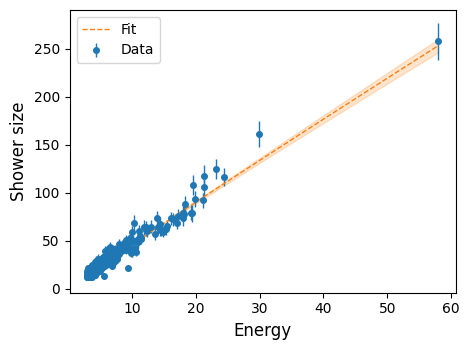

In [10]:
fitter.plot_fit(xlabel="Energy", ylabel="Shower size")